In [1]:
# Import libraries
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
customers = pd.read_csv("olist_customers_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
order_payments = pd.read_csv("olist_order_payments_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
geolocation = pd.read_csv("olist_geolocation_dataset.csv")
reviews = pd.read_csv("olist_order_reviews_dataset.csv")
product = pd.read_csv("olist_products_dataset.csv")
seller = pd.read_csv("olist_sellers_dataset.csv")
translate = pd.read_csv("product_category_name_translation.csv")

In [3]:
#merging all files with order_id to one dataframe



df1 = order_items.merge(order_payments, on='order_id')
df2 = df1.merge(orders, on='order_id')
m_df = df2.merge(customers, on='customer_id')

print(m_df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 117601 entries, 0 to 117600
Data columns (total 22 columns):
order_id                         117601 non-null object
order_item_id                    117601 non-null int64
product_id                       117601 non-null object
seller_id                        117601 non-null object
shipping_limit_date              117601 non-null object
price                            117601 non-null float64
freight_value                    117601 non-null float64
payment_sequential               117601 non-null int64
payment_type                     117601 non-null object
payment_installments             117601 non-null int64
payment_value                    117601 non-null float64
customer_id                      117601 non-null object
order_status                     117601 non-null object
order_purchase_timestamp         117601 non-null object
order_approved_at                117586 non-null object
order_delivered_carrier_date     116356 non-null 

In [4]:
# Convert InvoiceDate from object to datetime format
m_df['order_purchase_timestamp'] = pd.to_datetime(m_df['order_purchase_timestamp'])

In [5]:
# --Group customers in acquisition cohorts based on the month they made their first purchase--
# Create function to truncate given date in column to a first day of the month
def get_month(x): return dt.datetime(x.year, x.month, 1)

In [8]:
# Apply function to invoice date to invoice month column
m_df['InvoiceMonth'] = m_df['order_purchase_timestamp'].apply(get_month)
grouping1 = m_df.groupby('customer_unique_id')['InvoiceMonth']
m_df['CohortMonth'] = grouping1.transform('min')
print(m_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117601 entries, 0 to 117600
Data columns (total 24 columns):
order_id                         117601 non-null object
order_item_id                    117601 non-null int64
product_id                       117601 non-null object
seller_id                        117601 non-null object
shipping_limit_date              117601 non-null object
price                            117601 non-null float64
freight_value                    117601 non-null float64
payment_sequential               117601 non-null int64
payment_type                     117601 non-null object
payment_installments             117601 non-null int64
payment_value                    117601 non-null float64
customer_id                      117601 non-null object
order_status                     117601 non-null object
order_purchase_timestamp         117601 non-null datetime64[ns]
order_approved_at                117586 non-null object
order_delivered_carrier_date     116356 n

In [9]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day
invoice_year, invoice_month, _ = get_date_int(m_df, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(m_df, 'CohortMonth')

In [10]:
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

In [11]:
m_df['CohortIndex'] = years_diff * 12 + months_diff + 1
m_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,InvoiceMonth,CohortMonth,CohortIndex
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,...,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,2017-09-01,2017-09-01,1
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,credit_card,3,...,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,2017-04-01,2017-04-01,1
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,credit_card,5,...,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,2018-01-01,2018-01-01,1
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,credit_card,2,...,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,2018-08-01,2018-08-01,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1,credit_card,3,...,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,2017-02-01,2017-02-01,1


In [13]:
# Count monthly active customers from each cohort
grouping_count = m_df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping_count['customer_unique_id'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                  columns='CohortIndex',
                                  values='customer_unique_id')
print(cohort_counts.head())

CohortIndex      1    2    3    4    5    6    7    8    9    10   11   12  \
CohortMonth                                                                  
2016-09-01      2.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2016-10-01    305.0  NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  1.0  NaN  1.0   
2016-12-01      1.0  1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2017-01-01    754.0  3.0  2.0  1.0  3.0  1.0  3.0  1.0  1.0  NaN  3.0  1.0   
2017-02-01   1705.0  4.0  5.0  2.0  7.0  2.0  4.0  3.0  2.0  3.0  2.0  5.0   

CohortIndex   13   14   15   16   17   18   20   21  
CohortMonth                                          
2016-09-01   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2016-10-01   NaN  1.0  NaN  1.0  NaN  1.0  2.0  2.0  
2016-12-01   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-01-01   5.0  3.0  1.0  1.0  2.0  3.0  1.0  NaN  
2017-02-01   2.0  3.0  2.0  1.0  1.0  4.0  NaN  NaN  


In [14]:
print(cohort_counts)

CohortIndex      1     2     3     4     5     6     7     8     9     10  \
CohortMonth                                                                 
2016-09-01      2.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2016-10-01    305.0   NaN   NaN   NaN   NaN   NaN   1.0   NaN   NaN   1.0   
2016-12-01      1.0   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2017-01-01    754.0   3.0   2.0   1.0   3.0   1.0   3.0   1.0   1.0   NaN   
2017-02-01   1705.0   4.0   5.0   2.0   7.0   2.0   4.0   3.0   2.0   3.0   
2017-03-01   2595.0  13.0   9.0  10.0   9.0   4.0   4.0   8.0   9.0   2.0   
2017-04-01   2339.0  14.0   5.0   4.0   8.0   6.0   8.0   7.0   7.0   4.0   
2017-05-01   3560.0  17.0  17.0  14.0  11.0  12.0  15.0   5.0   9.0  10.0   
2017-06-01   3114.0  15.0  11.0  12.0   8.0  12.0  12.0   7.0   4.0   7.0   
2017-07-01   3843.0  20.0  14.0   9.0  11.0   8.0  12.0   4.0   7.0  10.0   
2017-08-01   4149.0  28.0  14.0  11.0  15.0  22.0  12.0  11.0   6.0   6.0   

In [30]:
# --Calculate Retention Rate--
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.round(3) * 100
#retention.index = retention.index.strftime('%m-%Y')

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21
CohortMonth,,,,,,,,,,,,,,,,,,,,
2016-09-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-01,100.0,NaN,NaN,NaN,NaN,NaN,0.3,NaN,NaN,0.3,NaN,0.3,NaN,0.3,NaN,0.3,NaN,0.3,0.7,0.7
2016-12-01,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01,100.0,0.4,0.3,0.1,0.4,0.1,0.4,0.1,0.1,NaN,0.4,0.1,0.7,0.4,0.1,0.1,0.3,0.4,0.1,NaN
2017-02-01,100.0,0.2,0.3,0.1,0.4,0.1,0.2,0.2,0.1,0.2,0.1,0.3,0.1,0.2,0.1,0.1,0.1,0.2,NaN,NaN
2017-03-01,100.0,0.5,0.3,0.4,0.3,0.2,0.2,0.3,0.3,0.1,0.4,0.1,0.2,0.1,0.2,0.2,0.1,0.2,NaN,NaN
2017-04-01,100.0,0.6,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.2,0.3,0.1,0.1,0.0,0.1,0.1,0.2,NaN,NaN,NaN
2017-05-01,100.0,0.5,0.5,0.4,0.3,0.3,0.4,0.1,0.3,0.3,0.3,0.3,0.3,0.0,0.2,0.3,NaN,NaN,NaN,NaN
2017-06-01,100.0,0.5,0.4,0.4,0.3,0.4,0.4,0.2,0.1,0.2,0.3,0.4,0.2,0.1,0.2,NaN,NaN,NaN,NaN,NaN


In [31]:
print(retention)

CohortIndex   1         2         3         4         5         6         7   \
CohortMonth                                                                    
2016-09-01   1.0       NaN       NaN       NaN       NaN       NaN       NaN   
2016-10-01   1.0       NaN       NaN       NaN       NaN       NaN  0.003279   
2016-12-01   1.0  1.000000       NaN       NaN       NaN       NaN       NaN   
2017-01-01   1.0  0.003979  0.002653  0.001326  0.003979  0.001326  0.003979   
2017-02-01   1.0  0.002346  0.002933  0.001173  0.004106  0.001173  0.002346   
2017-03-01   1.0  0.005010  0.003468  0.003854  0.003468  0.001541  0.001541   
2017-04-01   1.0  0.005985  0.002138  0.001710  0.003420  0.002565  0.003420   
2017-05-01   1.0  0.004775  0.004775  0.003933  0.003090  0.003371  0.004213   
2017-06-01   1.0  0.004817  0.003532  0.003854  0.002569  0.003854  0.003854   
2017-07-01   1.0  0.005204  0.003643  0.002342  0.002862  0.002082  0.003123   
2017-08-01   1.0  0.006749  0.003374  0.

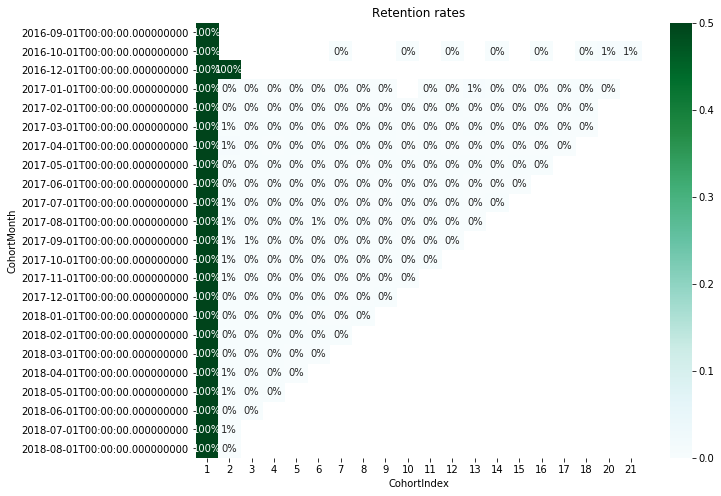

In [29]:
# --Plot heatmap using seaborn--
# Plot retention rates
plt.figure(figsize=(10, 8))
plt.title('Retention rates')
sns.heatmap(data = retention, annot = True, fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap = 'BuGn')
plt.show()
